In [2]:
import numpy as np
import astropy as ap
from astropy.io import fits
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import scipy as sp
import pandas as pd
plt.rcParams["figure.figsize"] = (12,10)
import lightkurve as lk
from astropy.utils.data import get_pkg_data_filename
from astropy.timeseries import TimeSeries

In [3]:
filename = get_pkg_data_filename('Data/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_lc.fits')
ts = TimeSeries.read(filename,format="tess.fits") #import as Time Series

D:\Software\Programming\Anaconda\lib\site-packages\astropy\timeseries\io\kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))


In [4]:
searchresult = lk.search_lightcurve("Pi Mensae",sector=1,mission="Tess")
print(searchresult)

SearchResult containing 5 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 01 2018      SPOC     120   261136679      0.0
  1 TESS Sector 01 2018 TESS-SPOC     600   261136679      0.0
  2 TESS Sector 01 2018       QLP    1800   261136679      0.0
  3 TESS Sector 01 2018     TASOC     120   261136679      0.0
  4 TESS Sector 01 2018     TASOC    1800   261136679      0.0


In [5]:
searchresult[0:2]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,261136679,0.0
1,TESS Sector 01,2018,TESS-SPOC,600,261136679,0.0


In [6]:
tpf =searchresult.download()

D:\Software\Programming\Anaconda\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Text(0.5, 1.0, 'Diagram 1: Unreduced Data')

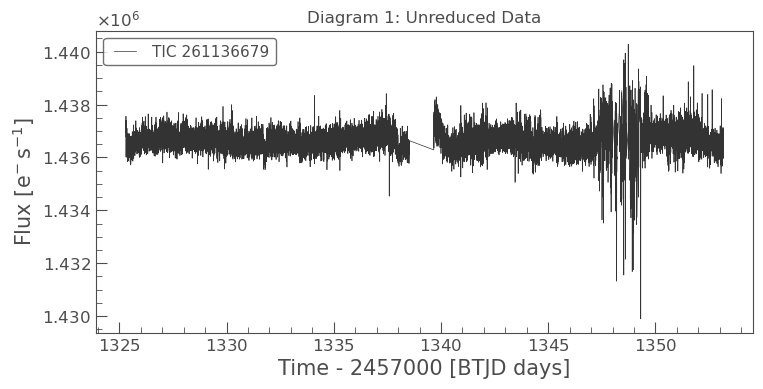

In [7]:
tpf.plot()
plt.gca()
plt.title("Diagram 1: Unreduced Data")

Text(0.5, 1.0, 'Diagram 2: Removed Outliers')

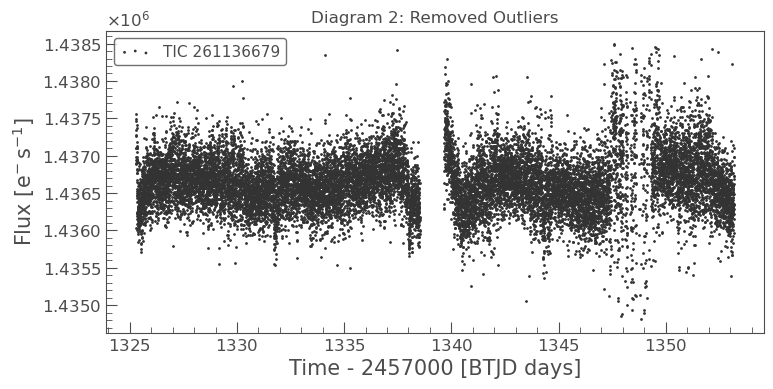

In [8]:
lc = tpf.remove_nans().remove_outliers()
lc.scatter()
plt.gca()
plt.title("Diagram 2: Removed Outliers")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

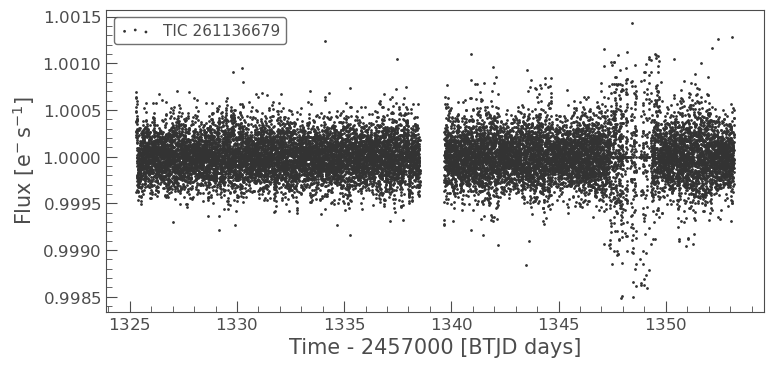

In [9]:
lc_flat = lc.flatten(window_length=501)
lc_flat.scatter()

[]

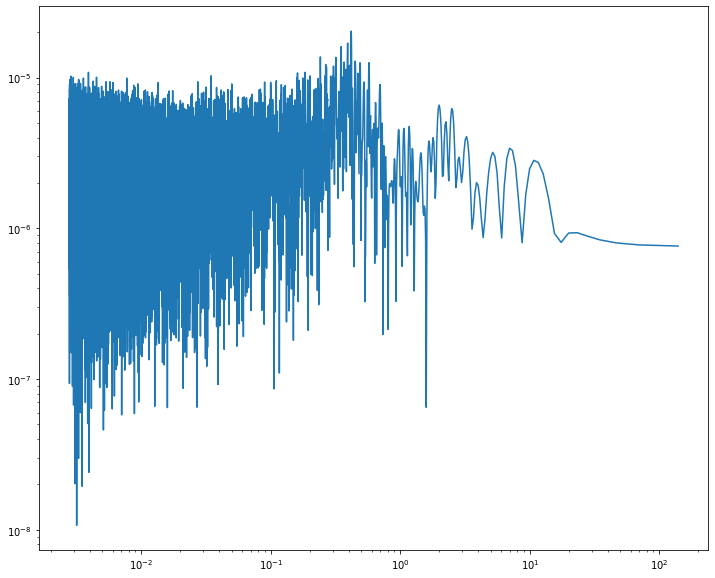

In [10]:
periodogram = lc_flat.to_periodogram()
plt.plot(periodogram.period,periodogram.power)
plt.loglog()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

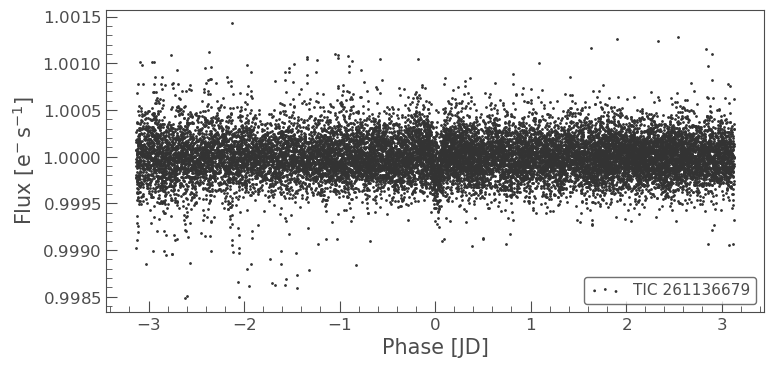

In [11]:
lc_fold = lc_flat.fold(period=6.26,epoch_time=1325.502)
lc_fold.scatter()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

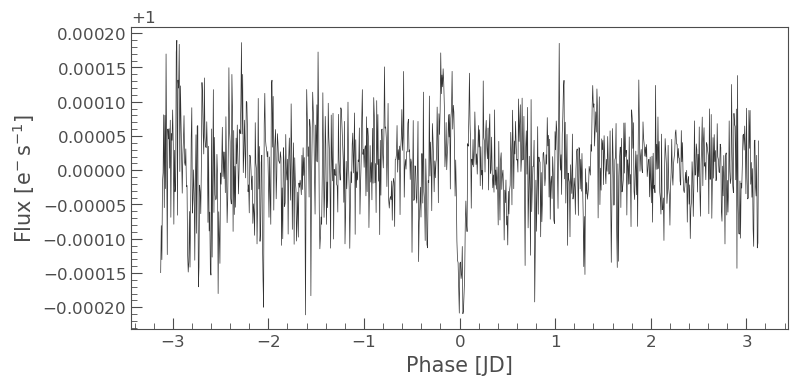

In [12]:
lc_bin = lc_fold.bin(bins=1000)
lc_bin.plot()